<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [5]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [12]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [14]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [30]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [31]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

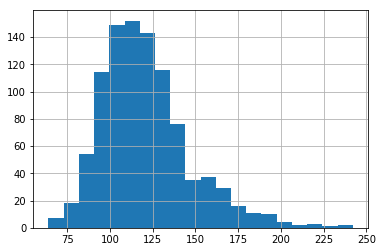

In [9]:
movies['duration'].hist(bins=20)

#### Use a box plot to display that same data.

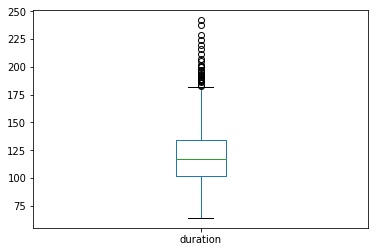

In [45]:
movies['duration'].plot.box()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [24]:
#movies.groupby('content_rating').title.count()
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

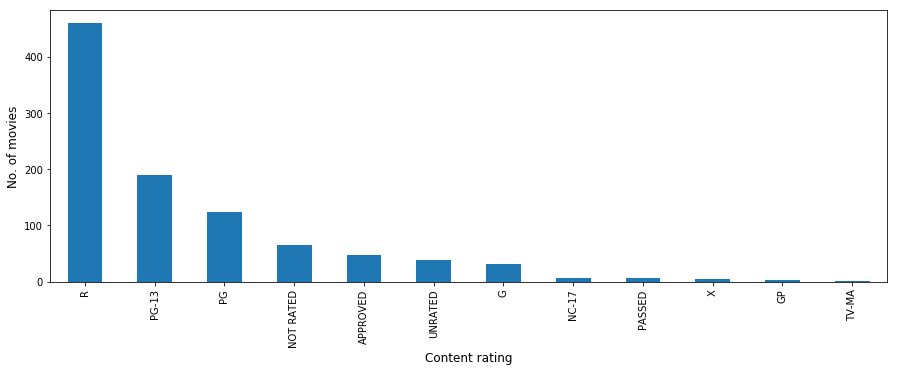

In [25]:
#ax = movies.groupby('content_rating').title.count().plot(kind='bar', figsize=(15,5))
ax = movies['content_rating'].value_counts().plot(kind='bar', figsize=(15,5))

ax.set_ylabel('No. of movies', fontsize=12);

# y-axis labels
ax.set_xlabel('Content rating', fontsize=12);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [33]:
rating_replace = ['NOT RATED', 'APPROVED', 'PASSED', 'GP']
movies['content_rating'] = movies['content_rating'].replace(rating_replace, 'UNRATED')


In [34]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [36]:
replace_rating_nc = ['X', 'TV-MA']
movies['content_rating'] = movies['content_rating'].replace(replace_rating_nc, 'NC-17')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [37]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [45]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [46]:
movies['content_rating'] = movies['content_rating'].fillna('UNRATED')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [50]:
star_long_movies = movies[movies['duration'] >= 120].star_rating.mean()
print(star_long_movies)

7.948898678414082


In [51]:
star_short_movies = movies[movies['duration'] < 120].star_rating.mean()
print(star_short_movies)

7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

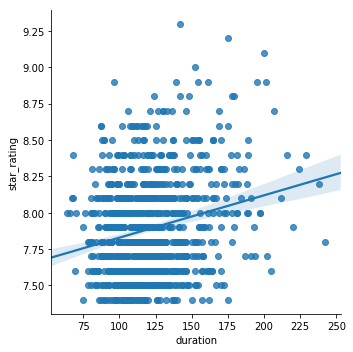

In [58]:
#movies.plot(x='duration', y='star_rating', kind='scatter')
import seaborn as sns
sns.lmplot(x='duration', y='star_rating', data=movies)

#### Calculate the average duration for each genre.

In [54]:
movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

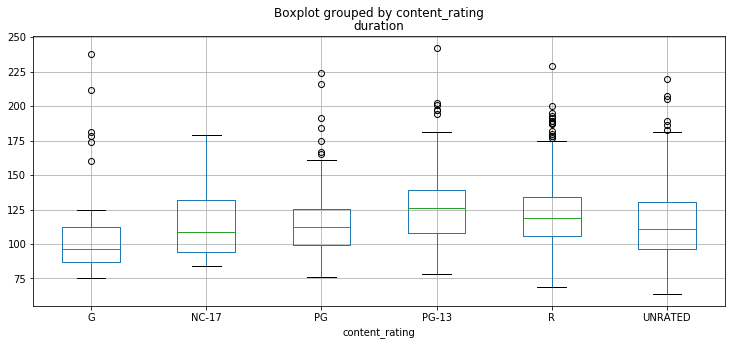

In [63]:
movies.boxplot(column='duration', by='content_rating', figsize=(12,5));

#### Determine the top rated movie (by star rating) for each genre.

In [74]:
header_display = ['genre', 'title', 'star_rating']
sort_movies = movies.sort_values('star_rating', ascending=False)
sort_movies.groupby('genre').head(1)[header_display]

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
3,Action,The Dark Knight,9.0
5,Drama,12 Angry Men,8.9
6,Western,"The Good, the Bad and the Ugly",8.9
7,Adventure,The Lord of the Rings: The Return of the King,8.9
8,Biography,Schindler's List,8.9
39,Horror,Psycho,8.6
38,Mystery,Rear Window,8.6
35,Comedy,Modern Times,8.6
30,Animation,Spirited Away,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [79]:
movies[movies['title'].duplicated(False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [98]:
genres = movies['genre'].value_counts() 
genres

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [99]:
filtered_genres = ['Drama', 'Comedy', 'Action', 'Crime', 
                   'Biography', 'Adventure', 'Animation', 
                   'Horror', 'Mystery']

selected_movies = movies['genre'].isin(filtered_genres)
print(movies[selected_movies].groupby('genre')['star_rating'].mean())

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [101]:
filtered_genres = list(genres[genres>10].index)
selected_movies = movies['genre'].isin(filtered_genres)
print(movies[selected_movies].groupby('genre')['star_rating'].mean())


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [103]:
booleanSeries = movies['genre'].value_counts() >= 10
booleanSeries

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [104]:
movieMeans = movies.groupby('genre').star_rating.mean()
movieMeans[booleanSeries]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [105]:
movie_list = movies.groupby('genre').star_rating.agg(['count', 'mean'])
movie_list['counts'] = movie_list['count']
movie_list[movie_list.counts >= 10]

,count,mean,counts
genre,,,
Action,136,7.884559,136
Adventure,75,7.933333,75
Animation,62,7.914516,62
Biography,77,7.862338,77
Comedy,156,7.822436,156
Crime,124,7.916935,124
Drama,278,7.902518,278
Horror,29,7.806897,29
Mystery,16,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!